In [8]:
# Importing required modules and helper functions for Logistic Regression modeling
import sys
notebook_path = sys.path.append(r'e:\Data science\Titanic dataset\notebooks')

# Importing main libraries
from auto_imports import *
model_results_imports()
from sklearn.preprocessing import OneHotEncoder , StandardScaler , RobustScaler , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV  # StratifiedKFold is already available in the notebook

### Data Preparation

Load and inspect the processed dataset for Logistic Regression.

In [9]:
# Load the processed dataset for Logistic Regression
logistic_df = pd.read_csv('E:\Data science\Titanic dataset\data\Processed data\Data Analysis\processed_data.csv')
logistic_df.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ind,cell_number,Cabin_letter,Title,FamilySize,Is Alone,Special Agent/route,TicketBatch,SharedTicket
0,1,0.0,3,male,22.0,1,0,7.2500,S,train,23-25-27,C,Mr,1,0,A/5,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C,train,85,C,Mrs,1,0,PC,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,S,train,23-25-27,C,Miss,0,1,STON/O2,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,S,train,123,C,Mrs,1,0,Non-special,0,0
4,5,0.0,3,male,35.0,0,0,8.0500,S,train,23-25-27,C,Mr,0,1,Non-special,0,0


In [10]:
# Check info of the loaded dataset
logistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1309 non-null   int64  
 1   Survived             891 non-null    float64
 2   Pclass               1309 non-null   int64  
 3   Sex                  1309 non-null   object 
 4   Age                  1309 non-null   float64
 5   SibSp                1309 non-null   int64  
 6   Parch                1309 non-null   int64  
 7   Fare                 1309 non-null   float64
 8   Embarked             1307 non-null   object 
 9   ind                  1309 non-null   object 
 10  cell_number          1303 non-null   object 
 11  Cabin_letter         1309 non-null   object 
 12  Title                1309 non-null   object 
 13  FamilySize           1309 non-null   int64  
 14  Is Alone             1309 non-null   int64  
 15  Special Agent/route  1309 non-null   o

In [11]:
# Split the dataset into training and prediction sets
train_logistic_df = logistic_df.query('`ind` == "train"').drop(['ind' , 'PassengerId'] , axis=1)
predict_df = logistic_df.query('`ind` == "test"').drop(['ind' , 'Survived'] , axis=1)

In [12]:
# Preview the training data
train_logistic_df.head() # take a look on training data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilySize,Is Alone,Special Agent/route,TicketBatch,SharedTicket
0,0.0,3,male,22.0,1,0,7.2500,S,23-25-27,C,Mr,1,0,A/5,0,0
1,1.0,1,female,38.0,1,0,71.2833,C,85,C,Mrs,1,0,PC,0,0
2,1.0,3,female,26.0,0,0,7.9250,S,23-25-27,C,Miss,0,1,STON/O2,0,0
3,1.0,1,female,35.0,1,0,53.1000,S,123,C,Mrs,1,0,Non-special,0,0
4,0.0,3,male,35.0,0,0,8.0500,S,23-25-27,C,Mr,0,1,Non-special,0,0


In [13]:
# Show all unique values of categorical columns to determine encoding strategy
for col in train_logistic_df.select_dtypes('O').columns: # show all unique values of all categorical data to see the best encoding for them
    print(f'Column: {col}\n \n',train_logistic_df[col].unique(),'\n Count: ' , {len(train_logistic_df[col].unique())})

Column: Sex
 
 ['male' 'female'] 
 Count:  {2}
Column: Embarked
 
 ['S' 'C' 'Q' nan] 
 Count:  {4}
Column: cell_number
 
 ['23-25-27' '85' '123' '46' '6' '103' '56' '78' '33' '30' '52' '28' '83'
 '73' '31' '5' '10-12' '26' '110' '58-60' '101' '69' '47' '86' '2' '19'
 '7' '49' '4' '32' '80' '36' '15' '93' '35' '87' '77' '67' '94' '125' '99'
 '118' nan '22-26' '106' '65' '54' '57-59-63-66' '34' '18' '124' '91' '40'
 '128' '37' '50' '82' '96-98' '10' '44' '104' '111' '92' '38' '21' '12'
 '63' '14' '20' '79' '25' '95' '39' '22' '70' '16' '68' '41' '9' '23' '48'
 '58' '126' '71' '51-53-55' '62-64' '24' '90' '45' '8' '121' '11' '3'
 '82-84' '17' '102' '42' '148'] 
 Count:  {98}
Column: Cabin_letter
 
 ['C' 'E' 'G' 'D' 'A' 'B' 'F' 'F-G' 'F-E' 'T'] 
 Count:  {10}
Column: Title
 
 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer'] 
 Count:  {17}
Column: Special Agent/route
 
 ['A/5' 'PC' 'STON/O2' 'Non-special' 'PP' 'CA' 

Target encoding will be used for all categorical columns except 'Sex' and 'Embarked', which will use One Hot Encoding.

In [14]:
# Check info of the training data
train_logistic_df.info()  fas

SyntaxError: invalid syntax (1701591417.py, line 2)

In [ ]:
# Convert 'Survived' column data type from float64 to int64
train_logistic_df['Survived'] = train_logistic_df['Survived'].astype(int) # convert survived data type 
"""(float64 --> int64)"""

'(float64 --> int64)'

In [ ]:
# Confirm the data type conversion
train_logistic_df['Survived'].dtype

dtype('int64')

In [ ]:
# Preview the prediction data
predict_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket
891,892,3,male,34.5,0,0,7.8292,Q,23-25-27,C,Mr,Kelly,Non-special,0,0
892,893,3,female,47.0,1,0,7.0000,S,23-25-27,C,Mrs,Wilkes,Non-special,0,0
893,894,2,male,62.0,0,0,9.6875,Q,23-25-27,C,Mr,Myles,Non-special,0,0
894,895,3,male,27.0,0,0,8.6625,S,23-25-27,C,Mr,Wirz,Non-special,0,0
895,896,3,female,22.0,1,1,12.2875,S,23-25-27,C,Mrs,Hirvonen,Non-special,0,1


In [ ]:
# Check info of the prediction data
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Sex                  418 non-null    object 
 3   Age                  418 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Fare                 418 non-null    float64
 7   Embarked             418 non-null    object 
 8   cell_number          416 non-null    object 
 9   Cabin_letter         418 non-null    object 
 10  Title                418 non-null    object 
 11  FamilyName           418 non-null    object 
 12  Special Agent/route  418 non-null    object 
 13  TicketBatch          418 non-null    int64  
 14  SharedTicket         418 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory 

In [ ]:
# Split features and target variable
x = train_logistic_df.drop('Survived' , axis=1)
y = train_logistic_df['Survived'] # our dependent variable

### Model Training

Fit the Logistic Regression model using the processed features.

In [ ]:
# Initialize the Logistic Regression model
logit = LogisticRegression(random_state=42, solver='liblinear' , class_weight='balanced')

In [ ]:
# Split features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=15 ,
                                                    stratify=y)

In [ ]:
# Evaluate model using cross-validation for accuracy and F1 score
accuracy , f1 = accuracy_f1_scores(X_train , y_train , logit)

CV=5 , random_state=42 , shuffel=True
accuracy:  0.792140254112085
f1:  0.7421651727286285
   Accuracy score  F1 score
0        0.811189  0.784000
1        0.769231  0.717949
2        0.732394  0.660714
3        0.859155  0.811321
4        0.788732  0.736842


In [ ]:
# Fit the Logistic Regression model on the training data
logit.fit(X_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


### Model Evaluation

Check model performance and drop percentages.

In [ ]:
# Calculate accuracy and F1 drop percentages, and get predictions on the test set
accuracy_DP , f1_DP , y_pred = drop_percentages(X_test , y_test , logit , accuracy , f1).values()

print('Accuracy drop percentage: ', accuracy_DP)
print('F1 drop percentages: ' , f1_DP)

Accuracy drop percentage:  -4.0%
F1 drop percentages:  -5.5%


In [ ]:
# Show classification report for predictions on the test set
print(classification_report(y_test , y_pred)) # seeing final report

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       110
           1       0.75      0.86      0.80        69

    accuracy                           0.83       179
   macro avg       0.82      0.84      0.83       179
weighted avg       0.84      0.83      0.83       179



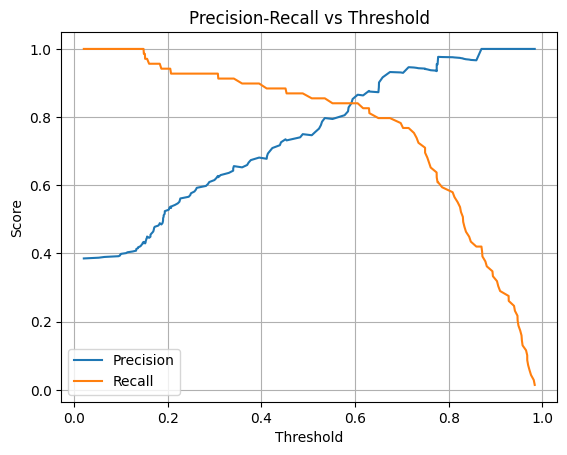

In [ ]:
# Plot precision-recall curve to help select an optimal threshold
from sklearn.metrics import precision_recall_curve

y_probs = logit.predict_proba(X_test)[:, 1]  # get probability of class 1

# calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

Select the threshold where precision and recall curves intersect for optimal balance.

In [ ]:
# Apply custom threshold for final predictions and show classification report
y_pred_custom = (y_probs >= 0.59)


print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       110
           1       0.84      0.84      0.84        69

    accuracy                           0.88       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



### Model Results

- Accuracy: ≈ 88%
- F1: ≈ 87%
- Model is balanced
- No signs of overfitting or underfitting

> This model is well-fitted and strong.

The model is now tuned and ready for ensembling with other models.

[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

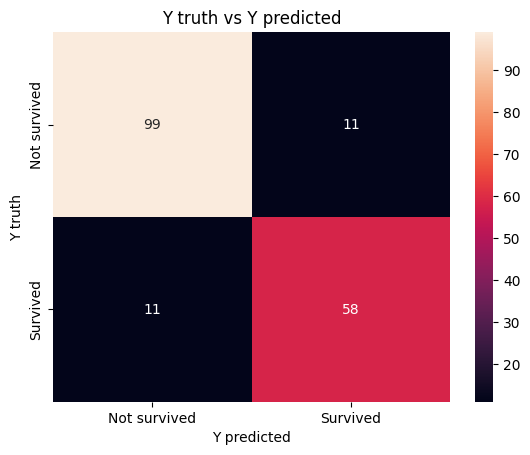

In [ ]:
# Plot confusion matrix for the custom threshold predictions
cm = confusion_matrix(y_test , y_pred_custom)
plt.title('Y truth vs Y predicted')
ax = sns.heatmap(cm ,annot=True)
plt.xlabel('Y predicted')
plt.ylabel('Y truth')
ax.set_xticklabels(['Not survived' , 'Survived'])
ax.set_yticklabels(['Not survived' , 'Survived'])

In [ ]:
# Preview processed features
x.head()

,Pclass,Age,SibSp,Parch,Fare,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S
0,3,-0.595254,1,0,-0.312011,0.300857,0.318282,0.155646,0.000000,0.083836,0,0,1,0,1
1,1,0.635996,1,0,2.461242,0.384292,0.329517,0.771706,0.384292,0.668414,0,0,0,1,0
2,3,-0.287441,0,0,-0.282777,0.309474,0.329517,0.721047,0.384292,0.599342,0,0,0,0,1
3,1,0.405137,1,0,1.673732,0.384292,0.329517,0.771706,0.384292,0.387213,0,0,0,0,1
4,3,0.405137,0,0,-0.277363,0.296900,0.325708,0.153592,1.000000,0.387708,0,0,1,0,1


In [ ]:
# Preview processed prediction data
predict_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S
891,892,3,0.366660,0,0,-0.286926,0.30112,0.323132,0.156918,0.689432,0.384266,0,0,1,0,0
892,893,3,1.328575,1,0,-0.322838,0.30112,0.323132,0.789738,0.383838,0.384266,0,0,0,0,1
893,894,2,2.482872,0,0,-0.206444,0.30112,0.323132,0.156918,0.383838,0.384266,0,0,1,0,0
894,895,3,-0.210488,0,0,-0.250836,0.30112,0.323132,0.156918,0.383838,0.384266,0,0,1,0,1
895,896,3,-0.595254,1,1,-0.093839,0.30112,0.323132,0.789738,1.000000,0.384266,0,1,0,0,1


In [ ]:
# Check info of the prediction data
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Age                  418 non-null    float64
 3   SibSp                418 non-null    int64  
 4   Parch                418 non-null    int64  
 5   Fare                 418 non-null    float64
 6   cell_number          418 non-null    float64
 7   Cabin_letter         418 non-null    float64
 8   Title                418 non-null    float64
 9   FamilyName           418 non-null    float64
 10  Special Agent/route  418 non-null    float64
 11  TicketBatch          418 non-null    int64  
 12  SharedTicket         418 non-null    int64  
 13  Male                 418 non-null    int64  
 14  Embarked_C           418 non-null    int64  
 15  Embarked_S           418 non-null    int64

In [ ]:
# Save model predictions for the prediction set for submission or ensembling
save_model_predictions((logit.predict_proba(
    predict_df.drop('PassengerId' , axis=1)
                                     )[: , 1] >= 0.59).astype(int),
                       'LogisticRegression'
                       )# Predicting predict data

In [ ]:
# Save the trained Logistic Regression model for later use (e.g., in ensembling)
import joblib

model_filename = r'E:\Data science\Titanic dataset\Models\LogisticRegression.pkl'

joblib.dump(logit , model_filename)

"""Model saved successfully"""

'Model saved successfully'

In [ ]:
# Save the processed training and prediction datasets for reproducibility
train_logistic_df = x.reset_index(drop=True)
train_logistic_df['Survived'] = y
train_logistic_df.to_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\training_data.csv' , 
                         index=False)

predict_df.to_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\predicting_data.csv',
                  index=False)